In [44]:
#Business Context : Provide clear recommendations to car delarship on what features consumers value in a used car 
#Datasets :Dataset from Kaggle that contains information on three million used cars. Your 
#Additional goal : Determine which factors make a car more or less expensive

# Meta-info
#1. Data is pulled from Kaggle ,scrambled data with no sensitive information
#2. Data will not be provided along with this code ,Only results of the code can be seen which best represent
# what the programmer is trying to achieve and not actually showing the data

In [45]:
# Import  libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O,XLS (e.g. pd.read_csv,pd.read_excel)

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action="ignore") 

In [46]:
#Importing the dataset
df=pd.read_csv("data/vehicles.csv")

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

0          6000
1         11900
2         21000
3          1500
4          4900
          ...  
426875    23590
426876    30590
426877    34990
426878    28990
426879    30590
Name: price, Length: 426880, dtype: int64

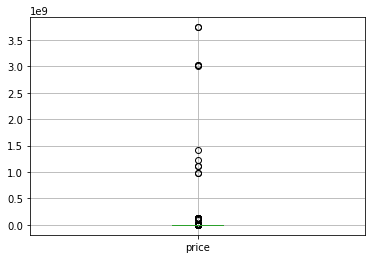

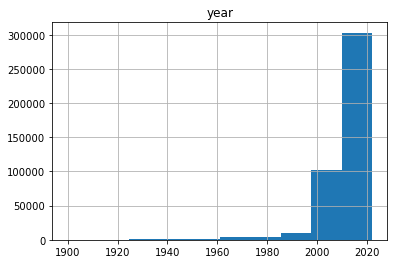

In [48]:
# I am driving my analysis with price as my basis. 
# Plotting a box graph to see the dristibution of price and year
boxplot = df.boxplot(column=['price'])  
#boxplot = df.hist(column=['price'])
boxplot = df.hist(column=['year'])  
df.price

In [49]:
# check for null values
df.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [50]:
#Drop columns which are of less relevance to the use case
df=df.drop(columns=['id','VIN','region']) 
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [51]:
#Treat Nulls 
# took 1900 as default value for year based on the distribution observed
df['year']=df['year'].fillna(1900) 

# defaulting odometer to 0
df['odometer']=df['odometer'].fillna(0)

# for the rest defaulting to other
df['manufacturer']=df['manufacturer'].fillna('other')
df['condition']=df['condition'].fillna('other')
df['fuel']=df['fuel'].fillna('other')
df['title_status']=df['title_status'].fillna('other')

df['title_status']=df['title_status'].fillna('other')
df['transmission']=df['transmission'].fillna('other')
df['drive']=df['drive'].fillna('other')
df['size']=df['size'].fillna('other')
df['paint_color']=df['paint_color'].fillna('other')
df['cylinders']=df['cylinders'].fillna('other')
df['type']=df['type'].fillna('other')
df['model']=df['model'].fillna('other')

In [52]:
df.describe()

,price,year,odometer
count,4.268800e+05,426880.000000,4.268800e+05
mean,7.519903e+04,2010.921196,9.703276e+04
std,1.218228e+07,11.131900,2.130067e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,5.900000e+03,2008.000000,3.627700e+04
50%,1.395000e+04,2013.000000,8.457000e+04
75%,2.648575e+04,2017.000000,1.330000e+05
max,3.736929e+09,2022.000000,1.000000e+07


In [53]:
import seaborn as sns

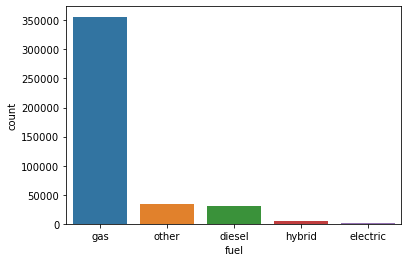

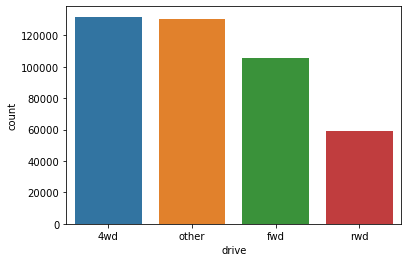

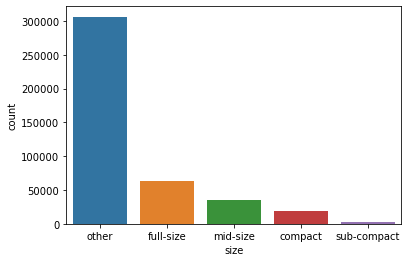

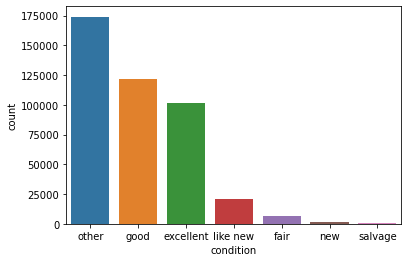

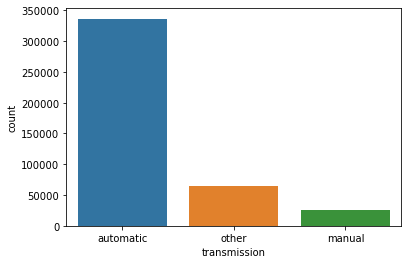

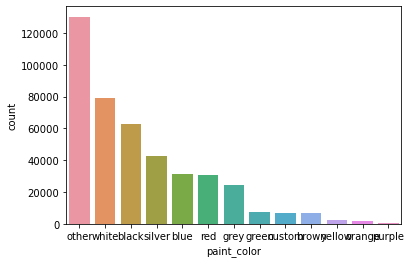

In [54]:
#Do Box plots to identify how data distribution of the features looks like 

# fuel 
plt.plot(1,2,2)
sns.countplot(data=df, x='fuel', order=df['fuel'].value_counts().index)
plt.show()
# type of drive
plt.plot(1,2,2)
sns.countplot(data=df, x='drive', order=df['drive'].value_counts().index)
plt.show()
# car size 
plt.plot(1,2,2)
sns.countplot(data=df, x='size', order=df['size'].value_counts().index)
plt.show()
# condition of the car
plt.plot(1,2,2)
sns.countplot(data=df, x='condition', order=df['condition'].value_counts().index)
plt.show()
# transmission type 
plt.plot(1,2,2)
sns.countplot(data=df, x='transmission', order=df['transmission'].value_counts().index)
plt.show()
# paint color 
plt.plot(1,2,2)
sns.countplot(data=df, x='paint_color', order=df['paint_color'].value_counts().index)
plt.show()

In [55]:
# since the data with others as value (Null) is skewing the results, drop these records
df.drop(df[(df['condition'] == 'other')].index, inplace=True)
df.drop(df[(df['transmission'] == 'other')].index, inplace=True)
df.drop(df[(df['paint_color'] == 'other')].index, inplace=True)
df.drop(df[(df['size'] == 'other')].index, inplace=True)
df.drop(df[(df['fuel'] == 'other')].index, inplace=True)
df.drop(df[(df['drive'] == 'other')].index, inplace=True)

# Delete outliers 
# Drop too old or recent year models 
df.drop(df[(df['year'] < 1980)].index, inplace=True)
df.drop(df[(df['year'] > 2018)].index, inplace=True)
# drop to expensive cars (I picked 300000)
df.drop(df[(df['price'] < 1000)].index, inplace=True)
df.drop(df[(df['price'] > 300000)].index, inplace=True)
# drop cars without clean title status
df.drop(df[(df['title_status'] != 'clean')].index, inplace=True)
# drop cards that were salvaged
df.drop(df[(df['condition'] == 'salvage')].index, inplace=True)

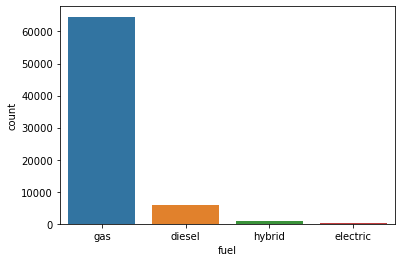

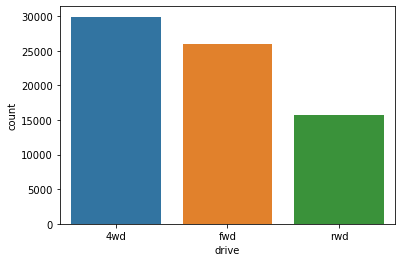

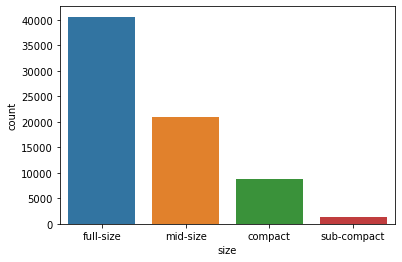

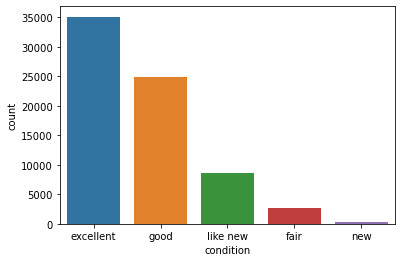

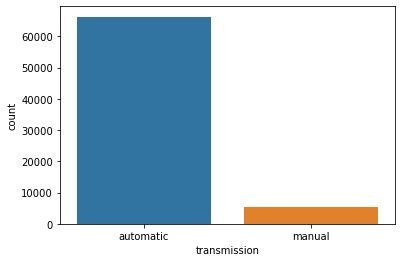

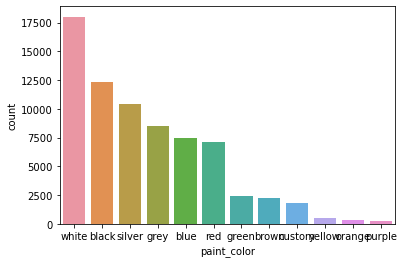

In [56]:
#Do Box plots to identify how data distribution of the features looks like 

# fuel 
plt.plot(1,2,2)
sns.countplot(data=df, x='fuel', order=df['fuel'].value_counts().index)
plt.show()
# type of drive
plt.plot(1,2,2)
sns.countplot(data=df, x='drive', order=df['drive'].value_counts().index)
plt.show()
# car size 
plt.plot(1,2,2)
sns.countplot(data=df, x='size', order=df['size'].value_counts().index)
plt.show()
# condition of the car
plt.plot(1,2,2)
sns.countplot(data=df, x='condition', order=df['condition'].value_counts().index)
plt.show()
# transmission type 
plt.plot(1,2,2)
sns.countplot(data=df, x='transmission', order=df['transmission'].value_counts().index)
plt.show()
# paint color 
plt.plot(1,2,2)
sns.countplot(data=df, x='paint_color', order=df['paint_color'].value_counts().index)
plt.show()

In [57]:
# now that we have identified some important features that could be useful chk for the most popular manufacturer
print(df['manufacturer'].value_counts())

ford               13579
chevrolet          10159
toyota              6130
honda               4248
nissan              3309
other               3149
gmc                 2790
jeep                2683
ram                 2510
dodge               2009
bmw                 1949
subaru              1640
mercedes-benz       1624
hyundai             1570
volkswagen          1513
chrysler            1236
kia                 1183
lexus               1133
cadillac            1053
mazda                892
buick                872
audi                 838
acura                617
lincoln              587
pontiac              584
volvo                571
infiniti             538
mitsubishi           530
mini                 422
rover                348
saturn               326
mercury              323
porsche              216
jaguar               195
fiat                 113
harley-davidson       38
tesla                 32
alfa-romeo            25
ferrari               10
land rover             8


# Observation 1 : 
1. Gas cars are of high demand and have sold the most
2. 4 Wheel Drive is most preferred followed by 2 Wheel drive
3. Full size cars are preferred the most
4. Automatic transmission and excellent condition cars sell the most
5. Ford,Chevy,Toyota,Jeep,Honda,GMC are the top cars

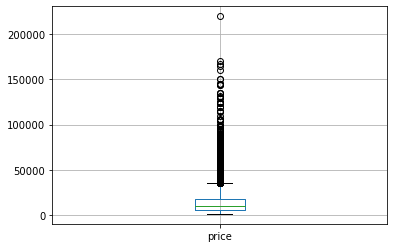

In [58]:
# checking the distribution of price it shows that that the most popular range is below 100000
boxplot = df.boxplot(column=['price'])

Text(0.5, 1.0, 'Brand vs Average Price')

<Figure size 1800x432 with 0 Axes>

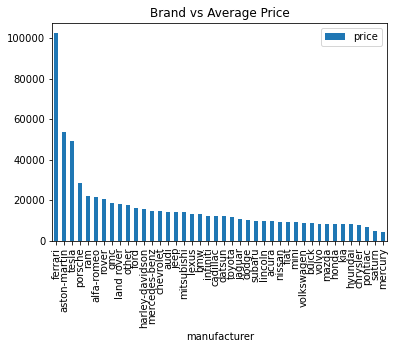

In [59]:
plt.figure(figsize=(25, 6))
df1 = pd.DataFrame(df.groupby(['manufacturer'])['price'].mean().sort_values(ascending = False))
df1.plot.bar()
plt.title('Brand vs Average Price')

In [60]:
# from the above graph we can clearly see that the Top brands are sweking the results. So drop the data
df.drop(df[(df['manufacturer'] == 'ferrari') 
           | (df['manufacturer'] == 'aston-martin')
           | (df['manufacturer'] == 'tesla')
           | (df['manufacturer'] == 'porsche')].index, inplace=True)

Text(0.5, 1.0, 'Paint vs Average Price')

<Figure size 1800x432 with 0 Axes>

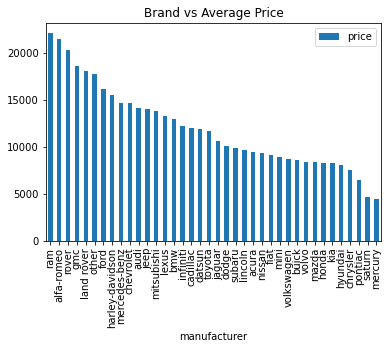

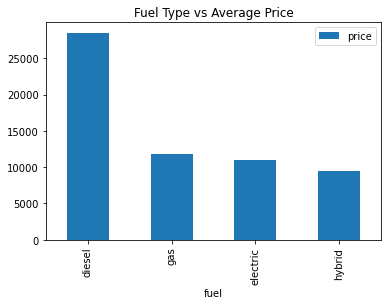

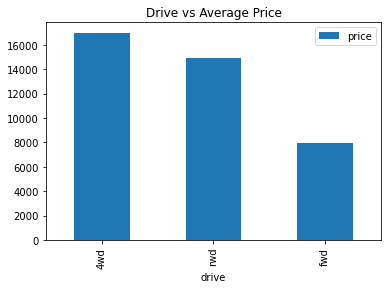

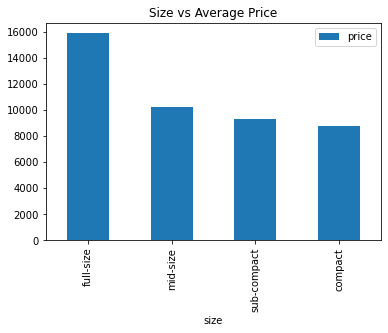

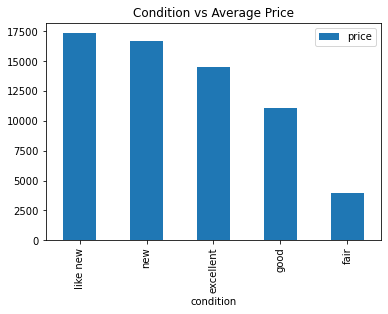

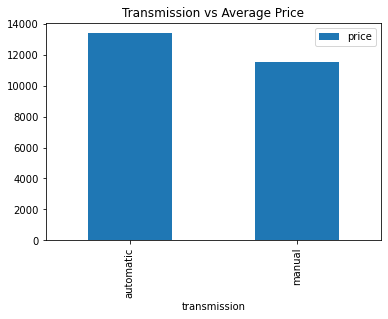

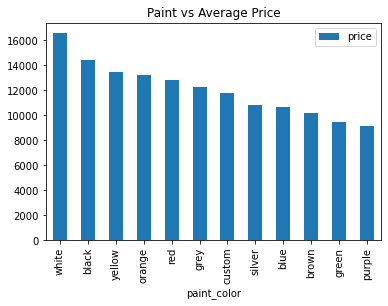

In [61]:
plt.figure(figsize=(25, 6))
df1 = pd.DataFrame(df.groupby(['manufacturer'])['price'].mean().sort_values(ascending = False))
df1.plot.bar()
plt.title('Brand vs Average Price')

df2 = pd.DataFrame(df.groupby(['fuel'])['price'].mean().sort_values(ascending = False))
df2.plot.bar()
plt.title('Fuel Type vs Average Price')

df3 = pd.DataFrame(df.groupby(['drive'])['price'].mean().sort_values(ascending = False))
df3.plot.bar()
plt.title('Drive vs Average Price')

df4 = pd.DataFrame(df.groupby(['size'])['price'].mean().sort_values(ascending = False))
df4.plot.bar()
plt.title('Size vs Average Price')

df5 = pd.DataFrame(df.groupby(['condition'])['price'].mean().sort_values(ascending = False))
df5.plot.bar()
plt.title('Condition vs Average Price')

df6 = pd.DataFrame(df.groupby(['transmission'])['price'].mean().sort_values(ascending = False))
df6.plot.bar()
plt.title('Transmission vs Average Price')

df7 = pd.DataFrame(df.groupby(['paint_color'])['price'].mean().sort_values(ascending = False))
df7.plot.bar()
plt.title('Paint vs Average Price')

#### Observation 2 : 
1. Full size cars are more expensive than Mid size
2. Diesel cars are more expensive than Gas 
3. Condition closer to new is expensive than Good or Excellent
4. 4WD is expensive than the rest
5. Ford,Chevy,Toyato all fall under the 20k-40k range which are the most sold car brands based on our previous observations

In [62]:
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
31,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al
55,19900,2004.0,ford,f250 super duty,good,8 cylinders,diesel,88000.0,clean,automatic,4wd,full-size,pickup,blue,al
59,14000,2012.0,honda,odyssey,excellent,6 cylinders,gas,95000.0,clean,automatic,fwd,full-size,mini-van,silver,al
65,22500,2001.0,ford,f450,good,8 cylinders,diesel,144700.0,clean,manual,rwd,full-size,truck,white,al
86,3000,2004.0,chrysler,town & country,good,6 cylinders,gas,176144.0,clean,automatic,fwd,mid-size,mini-van,silver,al


In [63]:
df=df.drop(columns=['model','cylinders'])

# distribute data into 2 buckets based odometer < and > 100000 
df['odometer_rating'] = df['odometer'].apply(lambda x: 0 if x >100000 else 1 )

df.head()

,price,year,manufacturer,condition,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,odometer_rating
31,15000,2013.0,ford,excellent,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al,0
55,19900,2004.0,ford,good,diesel,88000.0,clean,automatic,4wd,full-size,pickup,blue,al,1
59,14000,2012.0,honda,excellent,gas,95000.0,clean,automatic,fwd,full-size,mini-van,silver,al,1
65,22500,2001.0,ford,good,diesel,144700.0,clean,manual,rwd,full-size,truck,white,al,0
86,3000,2004.0,chrysler,good,gas,176144.0,clean,automatic,fwd,mid-size,mini-van,silver,al,0


Text(0.5, 1.0, 'state vs Average Price')

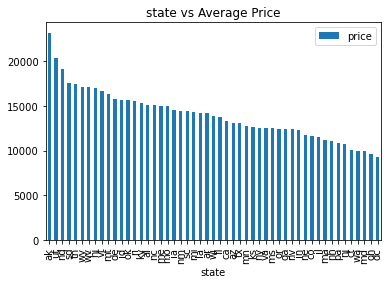

In [64]:
# check the sales by state
df9 = pd.DataFrame(df.groupby(['state'])['price'].mean().sort_values(ascending = False))
df9.plot.bar()
plt.title('state vs Average Price')

In [65]:
# considering state might not add value so droping the feature
df=df.drop(columns=['state'])
df.head()

,price,year,manufacturer,condition,fuel,odometer,title_status,transmission,drive,size,type,paint_color,odometer_rating
31,15000,2013.0,ford,excellent,gas,128000.0,clean,automatic,rwd,full-size,truck,black,0
55,19900,2004.0,ford,good,diesel,88000.0,clean,automatic,4wd,full-size,pickup,blue,1
59,14000,2012.0,honda,excellent,gas,95000.0,clean,automatic,fwd,full-size,mini-van,silver,1
65,22500,2001.0,ford,good,diesel,144700.0,clean,manual,rwd,full-size,truck,white,0
86,3000,2004.0,chrysler,good,gas,176144.0,clean,automatic,fwd,mid-size,mini-van,silver,0


<AxesSubplot:xlabel='paint_color', ylabel='price'>

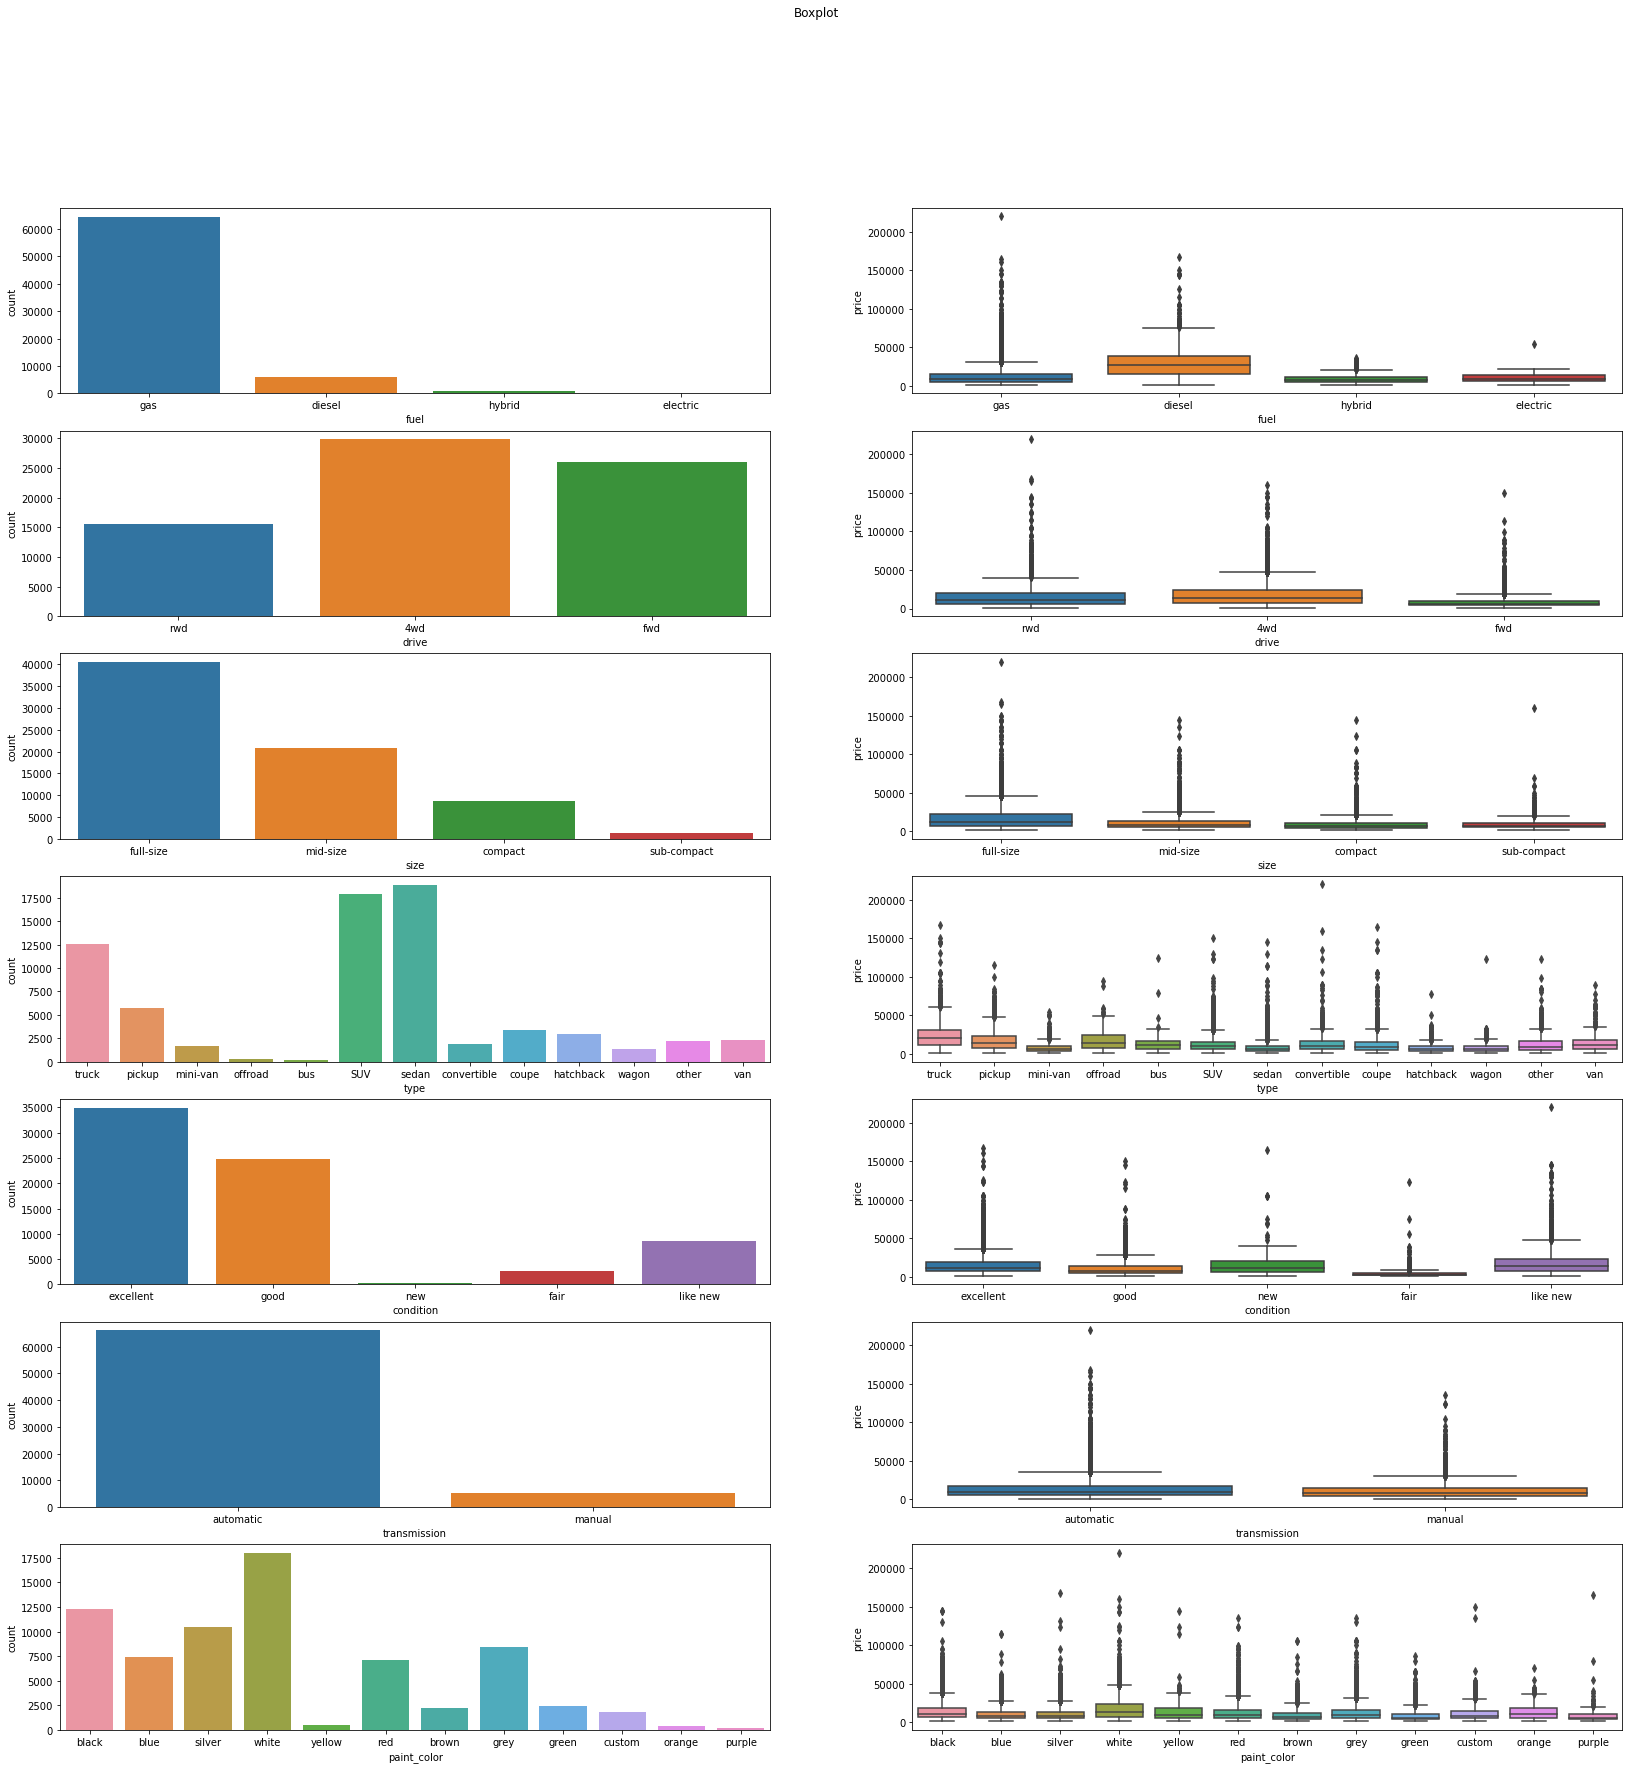

In [66]:
fig, axes = plt.subplots(7, 2, figsize=(28, 28))
fig.suptitle('Boxplot')
sns.countplot(ax=axes[0, 0], data=df, x='fuel')
sns.boxplot(ax=axes[0, 1], data=df, x='fuel', y='price')
sns.countplot(ax=axes[1, 0], data=df, x='drive')
sns.boxplot(ax=axes[1, 1], data=df, x='drive', y='price')
sns.countplot(ax=axes[2, 0], data=df, x='size')
sns.boxplot(ax=axes[2, 1], data=df, x='size', y='price')
sns.countplot(ax=axes[3, 0], data=df, x='type')
sns.boxplot(ax=axes[3, 1], data=df, x='type', y='price')
sns.countplot(ax=axes[4, 0], data=df, x='condition')
sns.boxplot(ax=axes[4, 1], data=df, x='condition', y='price')
sns.countplot(ax=axes[5, 0], data=df, x='transmission')
sns.boxplot(ax=axes[5, 1], data=df, x='transmission', y='price')
sns.countplot(ax=axes[6, 0], data=df, x='paint_color')
sns.boxplot(ax=axes[6, 1], data=df, x='paint_color', y='price')

# Observation 3 : 
1. Gas cars with Automatic transmission are most preferred and cheaper when compared to Desiel cars
2. Though Full size cars sell more, mid size cars especially min-van an wagon type cars are more effordable
3. Front wheel drive is cheaper when compared to 4 Wheel Drive
4. Good condition cars are cheaper and have good resale.

# Recommendation  for the best used cars in any manufacturer based on price is : Mid Size Automatic cars with Front wheel drive & Gas engine

In [67]:
df.head()

,price,year,manufacturer,condition,fuel,odometer,title_status,transmission,drive,size,type,paint_color,odometer_rating
31,15000,2013.0,ford,excellent,gas,128000.0,clean,automatic,rwd,full-size,truck,black,0
55,19900,2004.0,ford,good,diesel,88000.0,clean,automatic,4wd,full-size,pickup,blue,1
59,14000,2012.0,honda,excellent,gas,95000.0,clean,automatic,fwd,full-size,mini-van,silver,1
65,22500,2001.0,ford,good,diesel,144700.0,clean,manual,rwd,full-size,truck,white,0
86,3000,2004.0,chrysler,good,gas,176144.0,clean,automatic,fwd,mid-size,mini-van,silver,0


In [68]:
# Normalisation scales each input variable separately to the range 0-1, the range for floating-point values 
# where we have the most precision

df_results = df

dummy = pd.get_dummies(df[['fuel','condition','size','drive','transmission']])
df = pd.concat([df, dummy], axis=1)
pd.options.display.max_columns = None
df.head()

,price,year,manufacturer,condition,fuel,odometer,title_status,transmission,drive,size,type,paint_color,odometer_rating,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,size_compact,size_full-size,size_mid-size,size_sub-compact,drive_4wd,drive_fwd,drive_rwd,transmission_automatic,transmission_manual
31,15000,2013.0,ford,excellent,gas,128000.0,clean,automatic,rwd,full-size,truck,black,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0
55,19900,2004.0,ford,good,diesel,88000.0,clean,automatic,4wd,full-size,pickup,blue,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
59,14000,2012.0,honda,excellent,gas,95000.0,clean,automatic,fwd,full-size,mini-van,silver,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0
65,22500,2001.0,ford,good,diesel,144700.0,clean,manual,rwd,full-size,truck,white,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
86,3000,2004.0,chrysler,good,gas,176144.0,clean,automatic,fwd,mid-size,mini-van,silver,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0


In [69]:
df=df.drop(columns=['year','manufacturer','condition','fuel','odometer','title_status',
                    'transmission','drive','size','type','paint_color'])

In [70]:
df.head()

,price,odometer_rating,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,size_compact,size_full-size,size_mid-size,size_sub-compact,drive_4wd,drive_fwd,drive_rwd,transmission_automatic,transmission_manual
31,15000,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0
55,19900,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
59,14000,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0
65,22500,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
86,3000,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0


In [71]:
from sklearn.preprocessing import MinMaxScaler

In [72]:
#A correlation heatmap is a graphical representation of a correlation matrix representing the correlation between 
#different variables or features. It can also be defined as the measure of dependence between two other variables. 
#If there are multiple variables, the goal is to find a correlation between all of these variables.
scaler = MinMaxScaler()
num_vars = ['price']
df[num_vars] = scaler.fit_transform(df[num_vars])
pd.options.display.max_columns = None
#print(df.head())

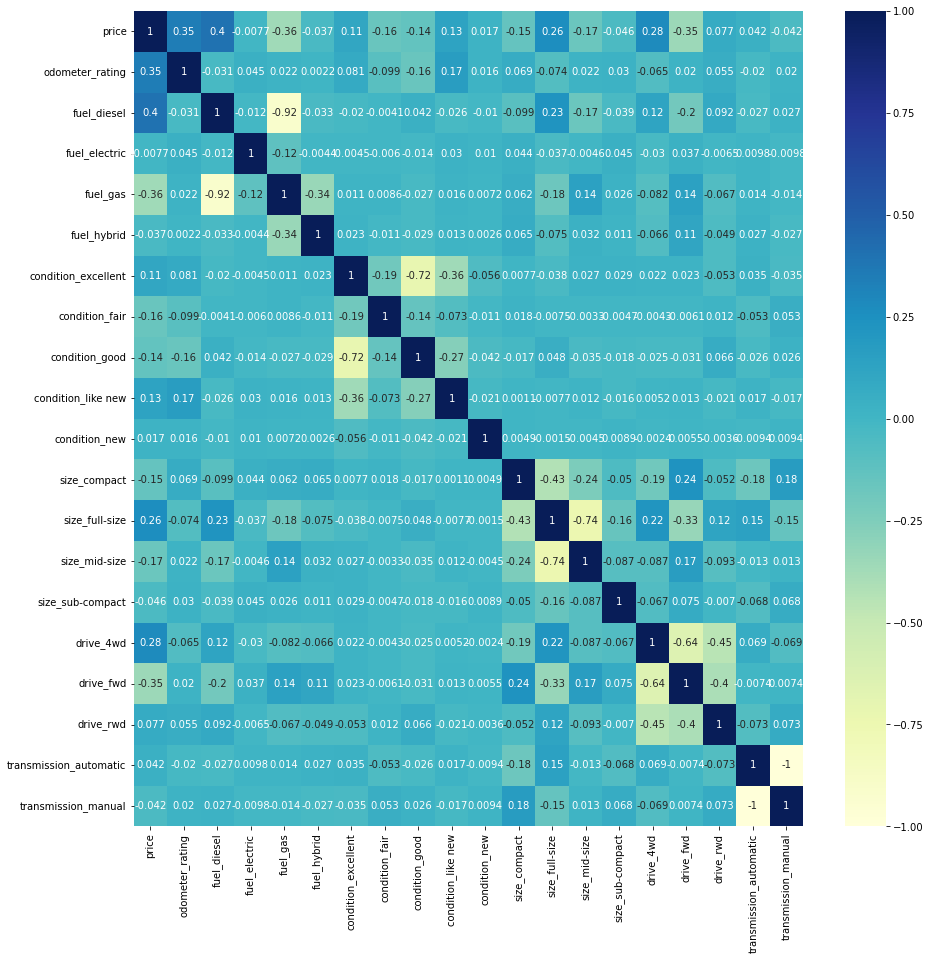

In [73]:
plt.figure(figsize = (15, 15))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
Y = df.pop('price')
X = df
np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [77]:
#Recursive feature elimination is the process of iteratively finding the most relevant features 
lr = LinearRegression()
lr.fit(x_train,y_train)
rfe = RFE(lr)
rfe = rfe.fit(x_train, y_train)
print(list(zip(x_train.columns, rfe.support_, rfe.ranking_)))


[('odometer_rating', False, 11), ('fuel_diesel', True, 1), ('fuel_electric', True, 1), ('fuel_gas', True, 1), ('fuel_hybrid', True, 1), ('condition_excellent', False, 6), ('condition_fair', False, 8), ('condition_good', False, 7), ('condition_like new', False, 4), ('condition_new', False, 5), ('size_compact', True, 1), ('size_full-size', False, 3), ('size_mid-size', True, 1), ('size_sub-compact', False, 2), ('drive_4wd', True, 1), ('drive_fwd', True, 1), ('drive_rwd', True, 1), ('transmission_automatic', False, 10), ('transmission_manual', False, 9)]


In [78]:
print(x_train.columns[rfe.support_])

Index(['fuel_diesel', 'fuel_electric', 'fuel_gas', 'fuel_hybrid',
       'size_compact', 'size_mid-size', 'drive_4wd', 'drive_fwd', 'drive_rwd'],
      dtype='object')


In [79]:
x_train_rfe = x_train[x_train.columns[rfe.support_]]
print(x_train_rfe.head())

        fuel_diesel  fuel_electric  fuel_gas  fuel_hybrid  size_compact  \
215719            0              0         1            0             0   
3993              0              0         1            0             1   
323374            0              0         1            0             0   
158388            1              0         0            0             0   
128038            0              0         1            0             0   

        size_mid-size  drive_4wd  drive_fwd  drive_rwd  
215719              0          1          0          0  
3993                0          0          1          0  
323374              0          0          0          1  
158388              0          1          0          0  
128038              0          1          0          0  


In [80]:
import statsmodels.api as sm

In [81]:
#Ordinary Least Squares regression (OLS) is a common technique for estimating coefficients of linear 
#regression equations which describe the relationship between one or more independent quantitative variables 
#and a dependent variable (simple or multiple linear regression).
#model = sm.OLS(y_train, sm.add_constant(x_train_rfe)).fit()
model = sm.OLS(y_train, sm.add_constant(x_train_rfe)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     2136.
Date:                Wed, 02 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:03:26   Log-Likelihood:                 83733.
No. Observations:               49910   AIC:                        -1.674e+05
Df Residuals:                   49901   BIC:                        -1.674e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.013e+11   5.19e+10     -1.951      0.051   -2.03e+11     4.7e+08
fuel_diesel    2.327e+10   2.97e+10      0.784      0.433   -3.49e+10    8.15e+10
fuel_electric  2.327e+10   2.97e+10      0.784      0.433   -3.49e+10    8.15e+10
fuel_gas       2.327e+10   2.97e+10      0.784      0.433   -3.49e+10    8.15e+10
fuel_hybrid    2.327e+10   2.97e+10      0.784      0.433   -3.49e+10    8.15e+10
size_compact     -0.0112      0.001    -16.514      0.000      -0.013      -0.010
size_mid-size    -0.0102      0.000    -21.290      0.000      -0.011      -0.009
drive_4wd      7.803e+10   3.75e+10      2.082      0.037    4.56e+09    1.51e+11
drive_fwd      7.803e+10   3.75e+10      2.082      0.037    4.56e+09    1.51e+11
drive_rwd      7.803e+10   3.75e+10      2.082      0.037    4.56e+09    1.51e+11
==============================================================================
Omnibus:                    27053.748   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           579559.323
Skew:                           2.157   Prob(JB):                         0.00
Kurtosis:                      19.127   Cond. No.                     6.45e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.78e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [82]:
x_train_new = x_train_rfe.drop(columns=['fuel_hybrid','fuel_electric'])
model = sm.OLS(y_train, sm.add_constant(x_train_new)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     2850.
Date:                Wed, 02 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:03:27   Log-Likelihood:                 83737.
No. Observations:               49910   AIC:                        -1.675e+05
Df Residuals:                   49903   BIC:                        -1.674e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0462      0.001     34.656      0.000       0.044       0.049
fuel_diesel       0.0564      0.002     29.383      0.000       0.053       0.060
fuel_gas         -0.0069      0.002     -3.885      0.000      -0.010      -0.003
size_compact     -0.0114      0.001    -16.985      0.000      -0.013      -0.010
size_mid-size    -0.0104      0.000    -21.663      0.000      -0.011      -0.009
drive_4wd         0.0292      0.001     55.183      0.000       0.028       0.030
drive_fwd        -0.0018      0.001     -3.447      0.001      -0.003      -0.001
drive_rwd         0.0188      0.001     32.891      0.000       0.018       0.020
==============================================================================
Omnibus:                    27082.785   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           579875.935
Skew:                           2.160   Prob(JB):                         0.00
Kurtosis:                      19.130   Cond. No.                     1.87e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.33e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

CONCLUSION: OLS regression result helps eliminating any features those are not highly correlated to the price. 
In the above Regression result, our model prediction is close to 25%. We removed some columns which are not highly 
correlated. We need to keep modifying features which can bring in more correlation but data has lot of missing values and huge outliers at every column making it adjust to the model

##### As per the above excercise we can recommend that Compact and mid size cars with either diesel or gas fuel influence the customer buying. The 4 wheel and rear wheel drive are more preferred. 